Explained Variance Ratio: [9.49042150e-01 5.01476654e-02 8.10184660e-04]


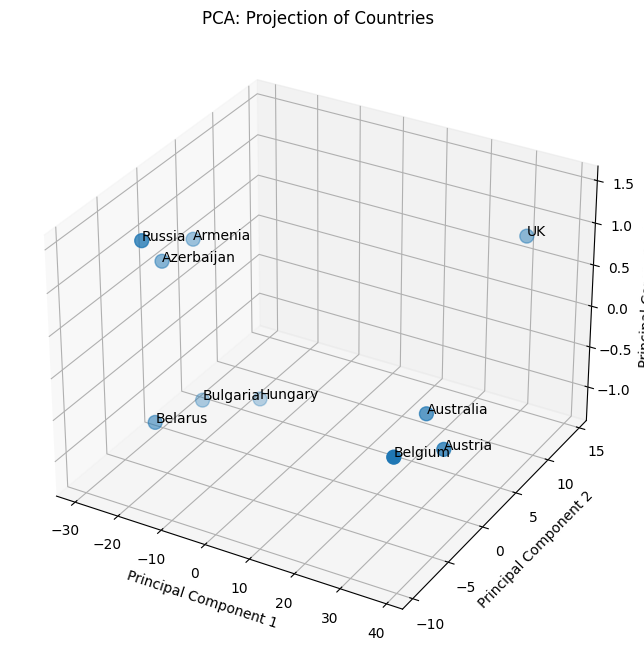

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {
    'Country': ['Russia', 'Australia', 'Austria', 'Azerbaijan', 'Armenia', 'Belarus', 'Belgium', 'Bulgaria', 'UK', 'Hungary'],
    'x(1)': [20.4, 71.4, 78.7, 12.1, 10.9, 20.4, 79.7, 17.3, 69.7, 24.5],
    'x(2)': [3.2, 8.5, 9.2, 3.3, 3.2, 5.4, 8.9, 5.4, 7.1, 6.0],
    'x(3)': [44.5, 32.5, 33.9, 38.8, 34.4, 43.6, 41.0, 36.4, 17.9, 32.1]
}

df = pd.DataFrame(data)

# Select the features for analysis (x(1), x(2), x(3))
X = df[['x(1)', 'x(2)', 'x(3)']]

# Apply PCA to extract three principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Combine the principal components with the original data
final_df = pd.concat([principal_df, df[['Country']]], axis=1)

# Output information about the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the countries in the three-dimensional space of principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'], final_df['Principal Component 3'], s=100)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA: Projection of Countries')

for i, country in enumerate(final_df['Country']):
    ax.text(final_df['Principal Component 1'][i], final_df['Principal Component 2'][i], final_df['Principal Component 3'][i], country)

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


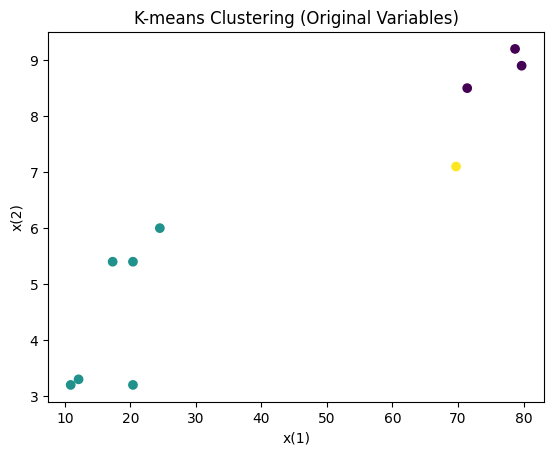

Cluster Assignments (Original Variables):
      Country  Cluster_Original
0      Russia                 1
1   Australia                 0
2     Austria                 0
3  Azerbaijan                 1
4     Armenia                 1
5     Belarus                 1
6     Belgium                 0
7    Bulgaria                 1
8          UK                 2
9     Hungary                 1


In [5]:
from sklearn.cluster import KMeans
X_original = df[['x(1)', 'x(2)', 'x(3)']]

# Apply K-means clustering on the original variables
kmeans_original = KMeans(n_clusters=3, random_state=42)
df['Cluster_Original'] = kmeans_original.fit_predict(X_original)

# Visualize the results
plt.scatter(df['x(1)'], df['x(2)'], c=df['Cluster_Original'], cmap='viridis')
plt.xlabel('x(1)')
plt.ylabel('x(2)')
plt.title('K-means Clustering (Original Variables)')
plt.show()

# Output the results
print("Cluster Assignments (Original Variables):")
print(df[['Country', 'Cluster_Original']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


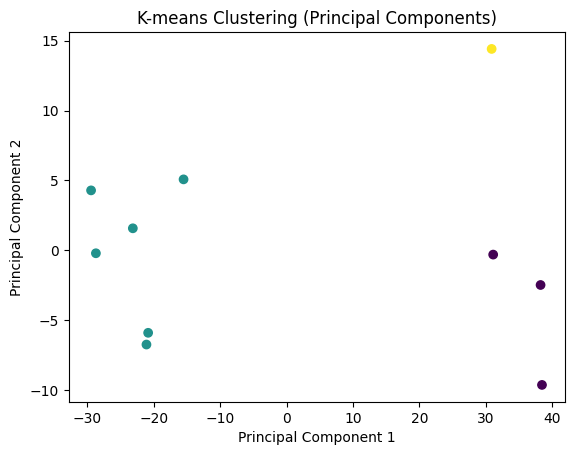

Cluster Assignments (Principal Components):
      Country  Cluster_PCA
0      Russia            1
1   Australia            0
2     Austria            0
3  Azerbaijan            1
4     Armenia            1
5     Belarus            1
6     Belgium            0
7    Bulgaria            1
8          UK            2
9     Hungary            1


In [6]:
# Select the principal components for analysis (Principal Component 1, Principal Component 2, Principal Component 3)
X_pca = principal_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]

# Apply K-means clustering on the principal components
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df['Cluster_PCA'] = kmeans_pca.fit_predict(X_pca)

# Visualize the results
plt.scatter(X_pca['Principal Component 1'], X_pca['Principal Component 2'], c=df['Cluster_PCA'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (Principal Components)')
plt.show()

# Output the results
print("Cluster Assignments (Principal Components):")
print(df[['Country', 'Cluster_PCA']])


Factor Loadings:
       Factor 1  Factor 2  Factor 3
x(1)  28.414307  2.062361 -3.052703
x(2)  -0.678038 -0.162045 -6.476572
x(3)   0.000000 -0.000000  0.000000


<Figure size 800x600 with 0 Axes>

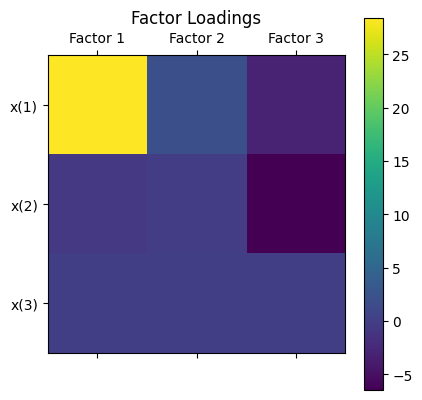

In [8]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=3, random_state=42)
fa.fit(X)

# Get the factor loadings (component loadings)
factor_loadings = fa.components_

# Create a DataFrame to display factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=['x(1)', 'x(2)', 'x(3)'])

# Output the factor loadings
print("Factor Loadings:")
print(factor_loadings_df)

# Plot the factor loadings
plt.figure(figsize=(8, 6))
plt.matshow(factor_loadings_df, cmap='viridis')
plt.colorbar()
plt.xticks(range(3), ['Factor 1', 'Factor 2', 'Factor 3'])
plt.yticks(range(3), ['x(1)', 'x(2)', 'x(3)'])
plt.title('Factor Loadings')
plt.show()





In [10]:
df2=pd.read_excel('sobakivolki.xlsx')
df2

,129.0,64.0,95.0,17.5,11.2,13.8,1.0
0,154,74,76,20.0,14.2,16.5,1.0
1,170,87,71,17.9,12.3,15.9,1.0
2,188,94,73,19.5,13.3,14.8,1.0
3,161,81,55,17.1,12.1,13.0,1.0
4,164,90,58,17.5,12.7,14.7,1.0
5,203,109,65,20.7,14.0,16.8,1.0
6,178,97,57,17.3,12.8,14.3,1.0
7,212,114,65,20.5,14.3,15.5,1.0
8,221,123,62,21.2,15.2,17.0,1.0
9,183,97,52,19.3,12.9,13.5,1.0


In [13]:
# Assuming your DataFrame is already defined as 'df' with the first row as header
new_column_names = ['dlina cherepa', 'dlina verh chelusti', 'shirina verh chelusti', 'dlina verh karnivora', 'dlina 1 verh molara', 'shirina 1 verh molara', '1-sobaka 2-volk']

# Assign the new column names to the DataFrame columns
df2.columns = new_column_names




In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' with the last row containing NaN for '1-sobaka 2-volk'
# We'll drop the last row for clustering
df2 = df2.dropna()

# Select the relevant columns for clustering
X = df2[['dlina cherepa', 'dlina verh chelusti', 'shirina verh chelusti', 'dlina verh karnivora', 'dlina 1 verh molara', 'shirina 1 verh molara']]


# Based on the Elbow curve, you can visually inspect and choose the optimal number of clusters (e.g., 2 clusters in this case)

# Perform K-Means clustering with the chosen number of clusters
n_clusters = 2  # You can adjust this based on the Elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X)

# Now, you can check which cluster the last row belongs to
last_row_cluster = df2.iloc[-1]['Cluster']

# Print the cluster assignment for the last row
print(f"The last row belongs to Cluster: {last_row_cluster}")


The last row belongs to Cluster: 1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


последний ряд это собака

In [17]:
import pandas as pd

data = {
    'No': list(range(1, 13)),
    'Рост': [163, 180, 153, 161, 173, 164, 157, 165, 171, 162, 159, 168],
    'Размах рук': [158, 172, 143, 155, 162, 158, 139, 149, 165, 154, 150, 167],
    'Длина предплечья': [25, 23, 18, 19, 20, 21, 24, 19, 23, 21, 22, 25],
    'Длина ног': [98, 92, 115, 88, 90, 95, 95, 98, 110, 90, 110, 99],
    'Окр. бедер': [84, 89, 93, 100, 92, 88, 91, 90, 86, 82, 85, 89],
    'Окр. груди': [98, 110, 99, 100, 84, 107, 98, 110, 90, 97, 86, 99],
    'Ширина груди ': [75,80,73,85,80,75,70,75,70,68,69,70]
    
}

df = pd.DataFrame(data)
print(df)


    No  Рост  Размах рук  Длина предплечья  Длина ног  Окр. бедер  Окр. груди   
0    1   163         158                25         98          84          98  \
1    2   180         172                23         92          89         110   
2    3   153         143                18        115          93          99   
3    4   161         155                19         88         100         100   
4    5   173         162                20         90          92          84   
5    6   164         158                21         95          88         107   
6    7   157         139                24         95          91          98   
7    8   165         149                19         98          90         110   
8    9   171         165                23        110          86          90   
9   10   162         154                21         90          82          97   
10  11   159         150                22        110          85          86   
11  12   168         167    

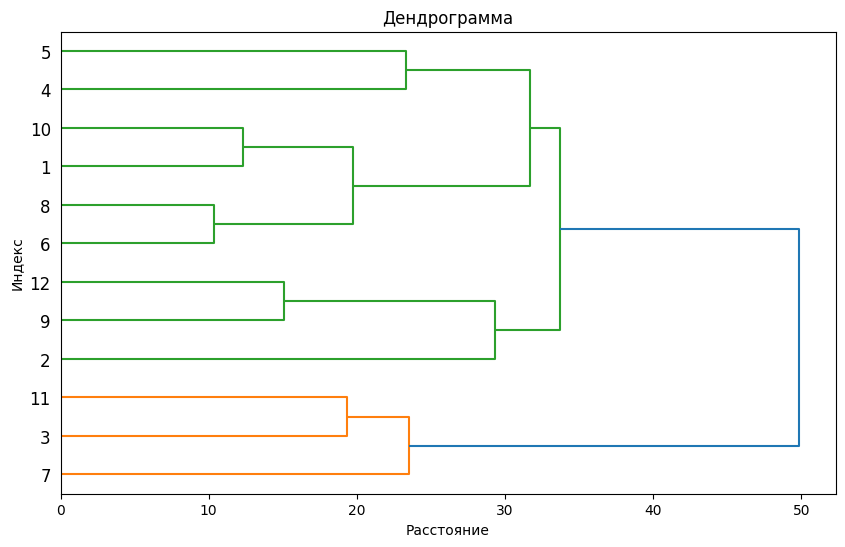

In [19]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Выбираем признаки для кластеризации
features = df.drop(['No'], axis=1)

# Выполняем иерархическую кластеризацию
linkage_matrix = hierarchy.linkage(features, method='ward')

# Строим дендрограмму
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df['No'].tolist(), orientation='right')
plt.xlabel('Расстояние')
plt.ylabel('Индекс')
plt.title('Дендрограмма')
plt.show()

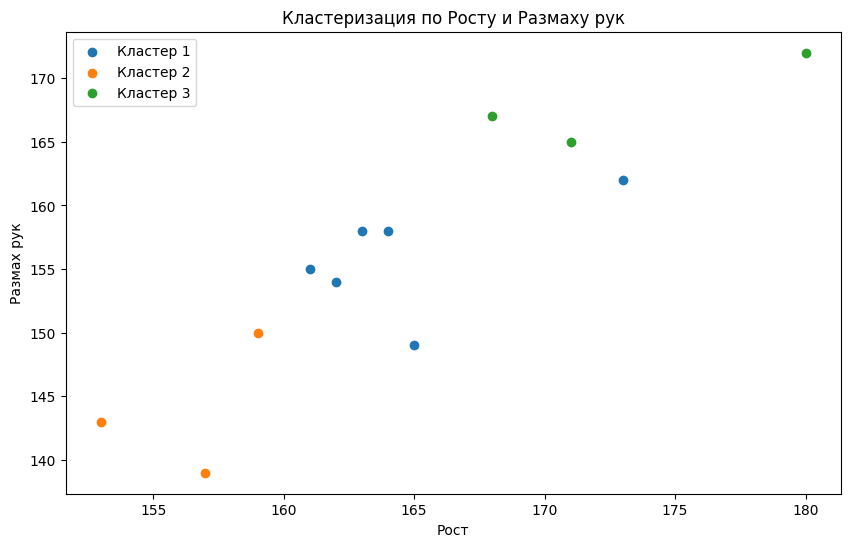

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Выполняем кластеризацию на основе дендрограммы с тремя кластерами
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
df['Cluster'] = agg_clustering.fit_predict(features)

# Визуализируем кластеры на двумерных графиках (выбираем два признака)
x_feature = 'Рост'
y_feature = 'Размах рук'

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Кластер {cluster + 1}')

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.title('Кластеризация по Росту и Размаху рук')
plt.show()

# Продолжите аналогично для других пар признаков, чтобы проинтерпретировать кластеры.


In [21]:
# Выбираем признаки для PCA
features = df.drop(['No'], axis=1)

# Выполняем PCA с двумя компонентами (F1 и F2)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
df['F1'] = principal_components[:, 0]
df['F2'] = principal_components[:, 1]

# Выводим таблицу с компонентами F1 и F2 для каждого объекта
print(df[['No', 'F1', 'F2']])

    No         F1         F2
0    1   0.892948   1.742310
1    2  25.080525  -2.330265
2    3 -22.295650  -0.313318
3    4   4.274100 -13.583947
4    5  10.667844   5.960372
5    6   4.107985  -6.548052
6    7 -15.035844  -9.250300
7    8  -2.319453 -10.892004
8    9   2.307262  18.125684
9   10  -0.850735  -1.767328
10  11 -15.243535  12.472214
11  12   8.414556   6.384634


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


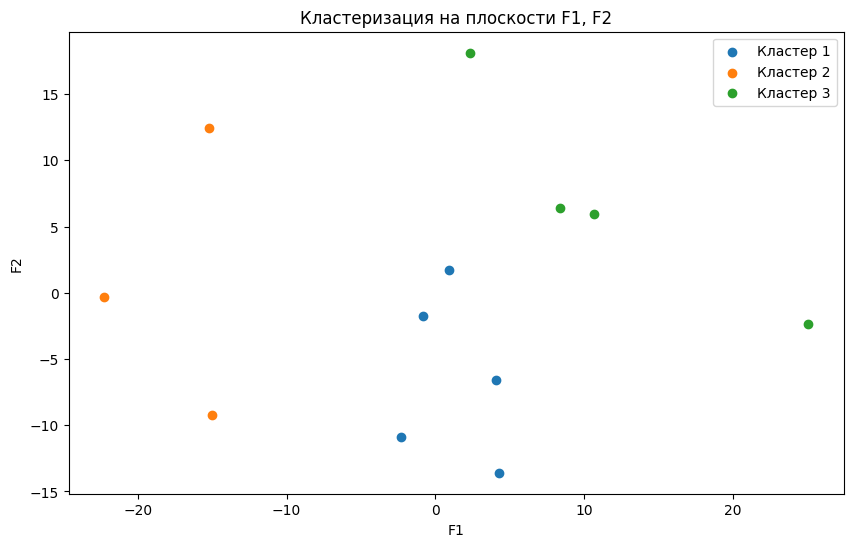

Полученные кластеры на плоскости F1, F2:
    No  Cluster_F1_F2
0    1              0
1    2              2
2    3              1
3    4              0
4    5              2
5    6              0
6    7              1
7    8              0
8    9              2
9   10              0
10  11              1
11  12              2

Первоначальные кластеры:
    No  Cluster
0    1        0
1    2        2
2    3        1
3    4        0
4    5        0
5    6        0
6    7        1
7    8        0
8    9        2
9   10        0
10  11        1
11  12        2


In [22]:
# Выбираем компоненты F1 и F2 для кластеризации
features = df[['F1', 'F2']]

# Выполняем кластеризацию на основе компонент F1 и F2 с тремя кластерами
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster_F1_F2'] = kmeans.fit_predict(features)

# Визуализируем кластеры на плоскости F1, F2
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster_F1_F2'] == cluster]
    plt.scatter(cluster_data['F1'], cluster_data['F2'], label=f'Кластер {cluster + 1}')

plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.title('Кластеризация на плоскости F1, F2')
plt.show()

# Сравниваем полученные кластеры с первоначальными
print("Полученные кластеры на плоскости F1, F2:")
print(df[['No', 'Cluster_F1_F2']])

print("\nПервоначальные кластеры:")
print(df[['No', 'Cluster']])

In [28]:
import sys
!{sys.executable} -m pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 570.6 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=f3b98c57fe93f73a962c9839fa4658af552ba42b29267b255d141472cc1ec8eb
  Stored in directory: /Users/savage/Library/Caches/pip/wheels/4c/f5/5c/d379f7e1bf1304f07e86af5e8826e1a625b1c5be59cb7c4904
Successfully built factor-analyzer

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


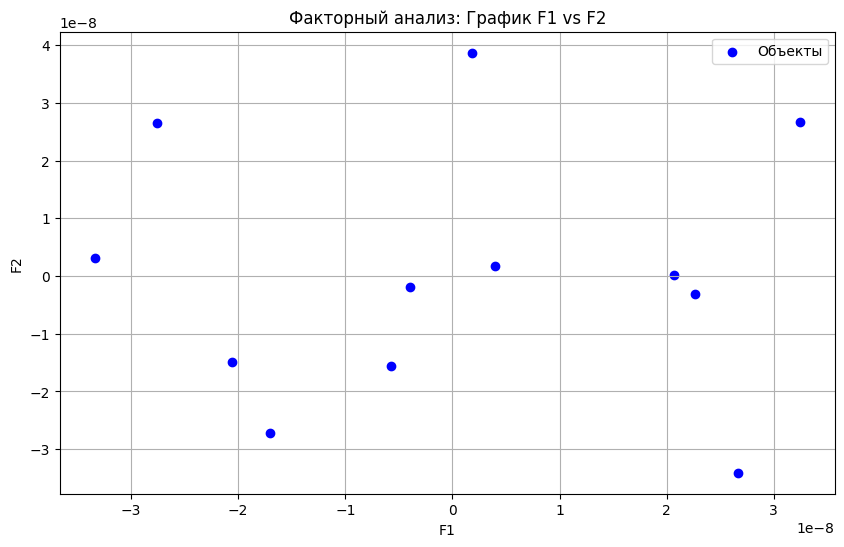

In [32]:
from factor_analyzer import FactorAnalyzer

# Выполняем факторный анализ
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(features)

# Вычисляем значения факторов (F1 и F2) для каждого объекта
factor_scores = fa.transform(features)
df['F1'] = factor_scores[:, 0]
df['F2'] = factor_scores[:, 1]

# Визуализируем объекты на плоскости F1 и F2
plt.figure(figsize=(10, 6))
plt.scatter(df['F1'], df['F2'], c='b', label='Объекты')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Факторный анализ: График F1 vs F2')
plt.grid(True)
plt.legend()
plt.show()
